adapted from :https://medium.com/@chand.shelvin/pybullet-getting-started-a068a0e3d492

http://www.mymodelrobot.appspot.com/5674976526991360

https://wiki.ros.org/urdf/XML/link

https://www.programcreek.com/python/example/122099/pybullet.setJointMotorControl2

In [3]:
import pybullet as p
import time
import pybullet_data
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
import random as r
from urdfpy import URDF
import urdfpy
import numpy as np

In [5]:
def visualizeURDF(File):
    physicsClient = p.connect(p.GUI)# p.DIRECT for non-graphical version
    p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally
    p.setGravity(0,0,-9.8)   
    planeId = p.loadURDF('plane.urdf')
    cubeStartPos = [0,0,1]
    cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
    boxId = p.loadURDF(File,cubeStartPos, cubeStartOrientation)
    p.setJointMotorControl2(boxId,(5),p.POSITION_CONTROL,-1.57)

    cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    # print(cubePos,cubeOrn)
    p.resetDebugVisualizerCamera( cameraDistance=3.5, cameraYaw=0, cameraPitch=-40, cameraTargetPosition=cubePos)
    for i in range (300):
        p.stepSimulation()
        time.sleep(1./300.)
    cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    print(cubePos,cubeOrn)
    p.disconnect()  

# p.disconnect()
# visualizeURDF("Models\Model_140.urdf")
# visualizeURDF("STARFISH2.0.urdf")
# visualizeURDF("Models/octopus.urdf")

# matcher = mean_absolute_error([-0.07800718441773057, -0.09148112632722061, -0.007044339657350115],[-0.1107156477189075, 5.136257331302503e-05, 0.0001232310900745431])
# print(matcher)  

# def edmoOrientation(q1, q2):
#     # Assuming vectors are represented as tuples (x, y)
#     x_resultant = q1[0] + q2[0]
#     y_resultant = q1[1] + q2[1]

#     # Calculate the magnitude of the resultant vector using Pythagorean theorem
#     magnitude_resultant = math.sqrt(x_resultant**2 + y_resultant**2)

#     # Calculate the direction angle in radians
#     direction_radians = math.atan2(y_resultant, x_resultant)
#     print(direction_radians)
#     # Convert radians to degrees if needed
#     direction_degrees = math.degrees(direction_radians)

#     return direction_degrees


# Leg 1, 5 @45 and 90
# q3 = (-0.03232683387366048, -0.07345052391191284, 0.0006095662267109053, 0.9967746108212154)
# q4 = (0.0001030281358315849, -0.11070579285807751, 0.0001308291500034012, 0.9938532083243486)

# orientation = edmoOrientation(q3,q4)
# print(orientation)

In [6]:
# 4 legged starfish.[[0.10038424283224191, -2.5319705873951107e-05, -0.0004969729635007379, 0.9949486198632488],[-0.10038085877465497, -2.5816714159629625e-05, 0.0005083451955946118, 0.9949489555300424],[1.9557973627556364e-05, -0.10061859289800221, 0.0004570184810641759, 0.994924966776299],[-2.9342634783195095e-05, 0.1007576192581765, 0.0002754417050166459, 0.9949109635702591]]
# [list(0.11071366557071198, 1.4306856382682968e-05, 0.00012585081957326537, 0.9938523372276092),list(-0.1107156715211334, 5.1359029875874616e-05, 0.00012322408656520903, 0.9938521128707727),list(0.00010303414843149941, -0.1107057358071606, 0.00013083062332979652, 0.9938532146784591),list(7.442984885374358e-05, 0.11069317401764413, 0.00011865797329432217, 0.9938546179428772)]
# p.disconnect()

In [71]:
def create_base_link(xyz_rpy):
    col = urdfpy.Collision(name=None,origin=urdfpy.xyz_rpy_to_matrix(xyz_rpy),geometry=urdfpy.Geometry(urdfpy.Box([.67,.67,.3]),None,None,None))
    vis = urdfpy.Visual(urdfpy.Geometry(urdfpy.Box([.67,.67,.3]),None,None,None),material=urdfpy.Material("red",[0.969, 0.129, 0.122,1]))    
    return urdfpy.Link("base_link",collisions=[col],inertial=None,visuals=[vis])

def create_arm_link(name,xyz_rpy):
    col = urdfpy.Collision(name=None,origin=urdfpy.xyz_rpy_to_matrix(xyz_rpy),geometry=urdfpy.Geometry(urdfpy.Box([.67,.67,.3]),None,None,None))
    vis = urdfpy.Visual(urdfpy.Geometry(urdfpy.Box([.67,.67,.3]),None,None,None),origin=urdfpy.xyz_rpy_to_matrix(xyz_rpy))    
    return urdfpy.Link(name,collisions=[col],inertial=urdfpy.Inertial(1,[[0, 0, 0],[0, 0, 0],[0, 0, 0]],urdfpy.xyz_rpy_to_matrix(xyz_rpy)),visuals=[vis])

def create_joint(parent,child,xyz_rpy,name,joint_type):
    child.origin = xyz_rpy
    jointdynam = urdfpy.JointDynamics(0,10)
    return urdfpy.Joint(name,joint_type=joint_type,parent=parent.name,child=child.name,limit=urdfpy.JointLimit(1.57,1.57,-1.57,1.57),origin=xyz_rpy,dynamics=jointdynam)

def create_appendige(base,xyz_rpy,name):
    arm1 = create_arm_link(name+"_arm1",[0, .34, 0,0,0,0])
    joint_base = create_joint(base,arm1,xyz_rpy,name+"_jointBase","fixed")
    arm2 = create_arm_link(name+"_arm2",[0, .34, 0,0,0,0])
    joint1 = create_joint(arm1,arm2,[0, .68, 0,0,0,0],name+"_joint1","revolute")
    return [arm1,arm2],[joint_base,joint1]

base = create_base_link([0,0,0,0,0,0])

links,joints = create_appendige(base,[0,.34,0,0,0,0],"set1")
links2,joints2 = create_appendige(base,[0,-.34,0,0,0,3.141],"set2")

links4,joints4 = create_appendige(base,[-.34,0,0,0,0,1.57],"set4")
links3,joints3 = create_appendige(links4[1],[0,.68,0,0,0,0],"set3")
links5,joints5 = create_appendige(base,[.34,0,0,0,0,-1.57],"set5")

# links6,joints6 = create_appendige(links3[1],[0,.68,0,0,0,0],"set6")

# links6,joints6 = create_appendige(links3[1],[0,.68,0,0,0,0],"set6") #bottom right

# robot = URDF("STARFISH2.0",links=links+links2+links3+links4+[base], joints=joints+joints2+joints3+joints4)
# robot.save("Models/STARFISH2.0.urdf")

# links,joints = create_appendige(base,[0,.34,0,0,0,0],"set1")
# links2,joints2 = create_appendige(base,[0,-.34,0,0,0,3.141],"set2")
# links3,joints3 = create_appendige(base,[.34,0,0,0,0,-2],"set3")
# links4,joints4 = create_appendige(base,[-.34,0,0,0,0,1.57],"set4")

# links5,joints5 = create_appendige(base,[-.34,.34,0,0,0,.785],"set5") #top left
# links6,joints6 = create_appendige(base,[.34,-.34,0,0,0,-2.355],"set6") #bottom right
# links7,joints7 = create_appendige(base,[.34,.34,0,0,0,-0.785],"set7") #top right
# links8,joints8 = create_appendige(base,[-.34,-.34,0,0,0,2.355],"set8") #bottom left

# robot = URDF("rob",links=links+links2+links3+links4+links5+links6+[base], joints=joints+joints2+joints3+joints4+joints5+joints6).show()
# #robot = URDF("STARFISH2.0",links=links+[base], joints=joints)

robot = URDF("rob",links=links+links2+links3+links4+links5+[base], joints=joints+joints2+joints3+joints4+joints).show()
# robot.save("christanRobotLONG.urdf")
# URDF.load("christanRobotLONG.urdf").show()


# visualizeURDF("Models/octopus.urdf")

ValueError: Two joints with name set1_jointBase found

In [8]:
def getDirectionOfMovement(q):# method by tom
    direction = math.atan2(q[1], q[0])
    return math.degrees(direction)

def getMountingPosition(q): # method by tom
    deg = getDirectionOfMovement(q)
    # print(round(deg))
    rnd = round(deg)
    # print(rnd)

    if (rnd == -180):
        rnd =180

    # Note: IMU moves in opposite direction of force, therefore a force coming from mounting position 3 will move the IMU at 180 degrees
    centers = [0, 45, 90, 135, 180, -45, -90, -135, 0]
    coordinates = [ [0, 0.34, 0],[-0.34, 0.34, 0], [-0.34, 0, 0],    [-0.34, -0.34, 0], [0, -0.34, 0],    [0.34, 0.34, 0],  [0.34, 0, 0],     [0.34, -0.34, 0]]    

    # Find the interval center closest to rnd
    closest_center = min(centers, key=lambda x: abs(x - rnd))
    index = centers.index(closest_center)

    return coordinates[index]
# getMountingPosition((0.11071366557071198, 1.4306856382682968e-05, 0.00012585081957326537, 0.9938523372276092))

In [54]:
# p.disconnect()
amountofmovements = 1
def movementSim(listMovements, fileName, amountOfMotors):
    
    simulatedIMUData = []
    
    # for position in listMovements:
    #     for i in range(1,4,2):

    #         physicsClient = p.connect(p.DIRECT)# p.DIRECT for non-graphical version
    #         p.setGravity(0,0,-9.8)   
    #         p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally

    #         planeId = p.loadURDF('plane.urdf')
    #         cubeStartPos = [0,0,1]
    #         cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
    #         # boxId = p.loadURDF('Models/Model_24.urdf',cubeStartPos, cubeStartOrientation)
    #         boxId = p.loadURDF('STARFISH2.0.urdf',cubeStartPos, cubeStartOrientation)
    #         # p.setJointMotorControl2(boxId,0,p.POSITION_CONTROL,-1)
    #         # p.setJointMotorControl2(boxId,1,p.POSITION_CONTROL,-1)
            
    #         p.setJointMotorControl2(boxId,(i),p.POSITION_CONTROL,position)
    #         p.setJointMotorControl2(boxId,(i+4),p.POSITION_CONTROL,position)

    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(cubePos,cubeOrn)
    #         p.resetDebugVisualizerCamera( cameraDistance=3.5, cameraYaw=30, cameraPitch=52, cameraTargetPosition=cubePos)
    #         for k in range (250):
    #             p.stepSimulation()
    #             # time.sleep(1./300.)
    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(str(i), cubeOrn)
            
    #         simulatedIMUData.append([[i,i+4], position,cubeOrn])
    #         p.disconnect()
    
    # for position in listMovements:
    #     for i in range(1,8,4):

    #         physicsClient = p.connect(p.DIRECT)# p.DIRECT for non-graphical version
    #         p.setGravity(0,0,-9.8)   
    #         p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally

    #         planeId = p.loadURDF('plane.urdf')
    #         cubeStartPos = [0,0,1]
    #         cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
    #         # boxId = p.loadURDF('Models/Model_24.urdf',cubeStartPos, cubeStartOrientation)
    #         boxId = p.loadURDF('STARFISH2.0.urdf',cubeStartPos, cubeStartOrientation)
    #         # p.setJointMotorControl2(boxId,0,p.POSITION_CONTROL,-1)
    #         # p.setJointMotorControl2(boxId,1,p.POSITION_CONTROL,-1)
            
    #         p.setJointMotorControl2(boxId,(i),p.POSITION_CONTROL,position)
    #         p.setJointMotorControl2(boxId,(i+2),p.POSITION_CONTROL,position)

    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(cubePos,cubeOrn)
    #         p.resetDebugVisualizerCamera( cameraDistance=3.5, cameraYaw=30, cameraPitch=52, cameraTargetPosition=cubePos)
    #         for k in range (250):
    #             p.stepSimulation()
    #             # time.sleep(1./300.)
    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(str(i), cubeOrn)
            
    #         simulatedIMUData.append([[i,i+2], position,cubeOrn])
    #         p.disconnect()
    
    for position in listMovements:
        for i in range(1,2,2):

            physicsClient = p.connect(p.DIRECT)# p.DIRECT for non-graphical version
            p.setGravity(0,0,-9.8)   
            p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally

            planeId = p.loadURDF('plane.urdf')
            cubeStartPos = [0,0,1]
            cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
            # boxId = p.loadURDF('Models/Model_24.urdf',cubeStartPos, cubeStartOrientation)
            boxId = p.loadURDF('STARFISH2.0.urdf',cubeStartPos, cubeStartOrientation)
            # p.setJointMotorControl2(boxId,0,p.POSITION_CONTROL,-1)
            # p.setJointMotorControl2(boxId,1,p.POSITION_CONTROL,-1)
            
            p.setJointMotorControl2(boxId,(i),p.POSITION_CONTROL,position)
            p.setJointMotorControl2(boxId,(i+2),p.POSITION_CONTROL,position)
            p.setJointMotorControl2(boxId,(i+4),p.POSITION_CONTROL,position)
            p.setJointMotorControl2(boxId,(i+6),p.POSITION_CONTROL,position)

            cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
            # print(cubePos,cubeOrn)
            p.resetDebugVisualizerCamera( cameraDistance=3.5, cameraYaw=30, cameraPitch=52, cameraTargetPosition=cubePos)
            for k in range (250):
                p.stepSimulation()
                # time.sleep(1./300.)
            cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
            # print(str(i), cubeOrn)
            
            simulatedIMUData.append([[i,i+2,i+4,i+6], position,cubeOrn])
            p.disconnect()
    

    # for position in listMovements:
    #     for j in range(1,amountOfMotors*2,2):

    #         physicsClient = p.connect(p.DIRECT)# p.DIRECT for non-graphical version
    #         p.setGravity(0,0,-9.8)   
    #         p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally

    #         planeId = p.loadURDF('plane.urdf')
    #         cubeStartPos = [0,0,1]
    #         cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
    #         # boxId = p.loadURDF('Models/Model_24.urdf',cubeStartPos, cubeStartOrientation)
    #         boxId = p.loadURDF(fileName,cubeStartPos, cubeStartOrientation)
    #         # p.setJointMotorControl2(boxId,0,p.POSITION_CONTROL,-1)
    #         # p.setJointMotorControl2(boxId,1,p.POSITION_CONTROL,-1)
            
    #         p.setJointMotorControl2(boxId,(j),p.POSITION_CONTROL,position)

    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(cubePos,cubeOrn)
    #         p.resetDebugVisualizerCamera( cameraDistance=3.5, cameraYaw=30, cameraPitch=52, cameraTargetPosition=cubePos)
    #         for k in range (200):
    #             p.stepSimulation()
    #             # time.sleep(1./200.)
    #         cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    #         # print(str(i), cubeOrn)
    #         simulatedIMUData.append([[j], position,cubeOrn])
    #         p.disconnect()

    return simulatedIMUData

# movementSim(1)
        
# print(movementSim(1))

# best, list1 = simulateModels("Model_Permutation",10,simulatedIMUData, 4)
# print(best)


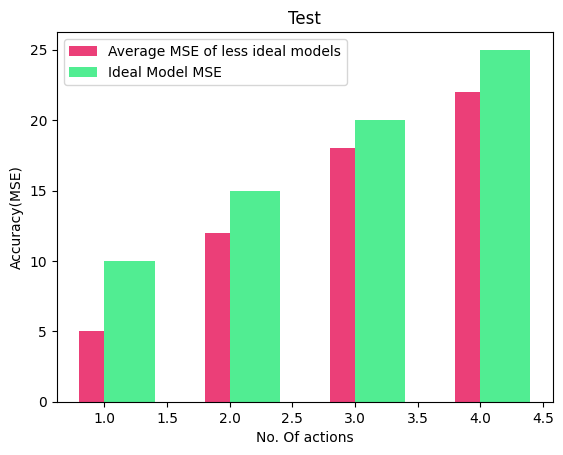

In [52]:
def create_bar_chart(list1, list2, title):
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length")

    x = range(1,len(list1)+1)
    plt.bar(x, list2, width=0.4, label='Average MSE of less ideal models',  color = "#eb3f78")

    plt.bar(x, list1, width=0.4, label='Ideal Model MSE', align='edge',color = "#51ed92")
    plt.title(title)

    plt.xlabel('No. Of actions')
    plt.ylabel('Accuracy(MSE)')
    plt.legend()

    plt.show()

# Example usage:
list1 = [10, 15, 20, 25]
list2 = [5, 12, 18, 22]

create_bar_chart(list1, list2, "Test")

expected:0.41926951217114017
averagesof bad 0.41392301760113326
['Model_Permutation2', 0.36828034626110684]
expected:0.7192325366888966
averagesof bad 0.7059274266898402
['Model_Permutation5', 0.6454774143217786]
expected:0.9979071424363345
averagesof bad 0.9810991598432754
['Model_Permutation5', 0.8926216173072865]
expected:1.2716764015646396
averagesof bad 1.2537261132743218
['Model_Permutation5', 1.1345107584962921]
expected:1.537840901850842
averagesof bad 1.524257114219571
['Model_Permutation5', 1.3780858471958717]
expected:1.8122639446056754
averagesof bad 1.792653056019142
['Model_Permutation5', 1.6195442484878544]
expected:2.0788389191214254
averagesof bad 2.05774456362609
['Model_Permutation5', 1.8562854888183038]
expected:2.358157662479363
averagesof bad 2.326851057544085
['Model_Permutation5', 2.103565431449528]
expected:2.6301790677142796
averagesof bad 2.599054533658446
['Model_Permutation5', 2.34701870543745]
expected:2.891513178725893
averagesof bad 2.8595309617574176
['

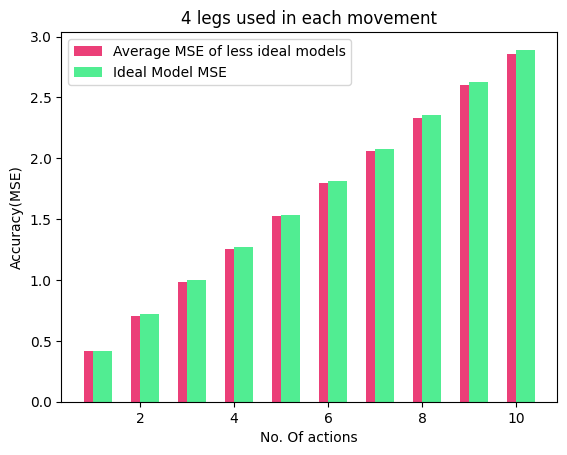

In [56]:
def create_list_of_lists(num_inner_lists):
    list_of_lists = [[] for _ in range(num_inner_lists)]
    return list_of_lists
# p.disconnect()
def simulateModels(pretext ,amountToSimulate, actionIMUList, motoramount):
    bestList = []
    listOfaverages = []
    expected = 0
    for i in range(0,amountToSimulate):
        bestList.append([pretext+str(i)])
    if amountToSimulate == 0:
        bestList.append([pretext])
    # print(bestList)
    # bestList= [["Model_Permutation7"],["Model_Permutation9"]]
    currentBest = ["NO IMPROVMENT FOUND",10]
    for model in bestList:
        best2 = create_list_of_lists(len(actionIMUList)) 
        
        for currentIMUCompareIndex in range(0,len(actionIMUList)):
            
            # for i in range(1,motoramount*2,2):
            # for i in range(1,4,2):    
                # print(i+1)
                physicsClient = p.connect(p.DIRECT)# p.DIRECT for non-graphical version
                p.setGravity(0,0,-9.8)   
                planeId = p.loadURDF('plane.urdf')
                cubeStartPos = [0,0,1]
                cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
                # print("experiement1/"+str(model[0])+'.urdf')
                if(amountToSimulate!=0):
                    boxId = p.loadURDF("experiement1/"+str(model[0])+'.urdf',cubeStartPos, cubeStartOrientation)
                else:
                    boxId = p.loadURDF("Models/"+pretext+'.urdf',cubeStartPos, cubeStartOrientation)

                if(len(actionIMUList[currentIMUCompareIndex][0])==1):
                    p.setJointMotorControl2(boxId,actionIMUList[currentIMUCompareIndex][0][0],p.POSITION_CONTROL,actionIMUList[currentIMUCompareIndex][1])
                else:
                    for l in range(0,len(actionIMUList[currentIMUCompareIndex][0])):
                        p.setJointMotorControl2(boxId,actionIMUList[currentIMUCompareIndex][0][l],p.POSITION_CONTROL,actionIMUList[currentIMUCompareIndex][1])

                for k in range (250):
                    p.stepSimulation()
                    # time.sleep(1./300.)
                _, cubeOrn = p.getBasePositionAndOrientation(boxId)
                mean = mean_absolute_error(actionIMUList[currentIMUCompareIndex][2],list(cubeOrn))

                # if("7" in model[0]):
                #     print("expected acc: "+str(mean))

                best2[currentIMUCompareIndex] = mean
                # print(cubePos,cubeOrn)
                # print(actionIMUList[currentIMUCompareIndex][0])
                # print(cubeOrn)
                # print(actionIMUList[currentIMUCompareIndex][2])
                # print(actionIMUList)
                p.disconnect()

        # print(best2)
        # print(model)
        if("7" in model[0]):
            print("expected:"+str(sum(best2)))
            expected = sum(best2)
        else:
            listOfaverages.append(sum(best2))

        if(sum(best2)<currentBest[1]):
            currentBest[1] = sum(best2)
            currentBest[0] = model[0]

    return currentBest, best2, sum(listOfaverages)/len(listOfaverages), expected

# p.disconnect()

listBad = []
listg = []

maxMovements = 11

for amountofmovements in range(1,maxMovements):

    listMovements = []
    for i in range(-15700,0,int(15700/amountofmovements)):
        listMovements.append(i/10000)
    # print(listMovements)

    if(len(listMovements)>amountofmovements):
        listMovements = listMovements[0:-1]

    IMU = movementSim(listMovements,"STARFISH2.0.urdf",4)
    # print(IMU)

    start_time = time.time()
    best, list1, averages, expected = simulateModels("Model_Permutation",10,IMU, 4)
    end_time = time.time()

    # with open('2opposite2perpendicular.txt', 'a') as file:
    #     # Write content to the file
    #     file.write(str(amountofmovements)+"\n"+str(best[1])+"\n"+str((end_time - start_time))+"\n"+best[0]+"\n")
    listBad.append(averages)
    listg.append(expected)
    print("averagesof bad",averages)
    print(best)
    
create_bar_chart(listg,listBad,"4 legs used in each movement")

# print(list1)
# simulateModels("Model_",3, [[0.11071366557071198, 1.4306856382682968e-05, 0.00012585081957326537, 0.9938523372276092],[-0.1107156715211334, 5.1359029875874616e-05, 0.00012322408656520903, 0.9938521128707727],[0.00010303414843149941, -0.1107057358071606, 0.00013083062332979652, 0.9938532146784591],[7.442984885374358e-05, 0.11069317401764413, 0.00011865797329432217, 0.9938546179428772]],4)

In [11]:
# URDF.load("experiement1/Model_Permutation5.urdf").show()

In [12]:

def simulateModelArm(pretext ,amountToSimulate, indexToSimulate, compareOrientations, motoramount, MSE):
    bestList = []
    for i in range(0,amountToSimulate):
        bestList.append([pretext+str(i)])
    # print(bestList)
    bestNumbers = create_list_of_lists(int(len(compareOrientations)/motoramount))
    
    currentBest = ["na",10]
    # print(len(compareOrientations)/motoramount)

    # sumOfRelevantOrientations = 0
    # temp = indexToSimulate
    # # print(temp)
    # for j in range(0,int(len(compareOrientations)/motoramount)):
    if(indexToSimulate==1 or indexToSimulate==5):
        sumOfRelevantOrientations = MSE[0]
    else:
        sumOfRelevantOrientations = MSE[1]

    #     sumOfRelevantOrientations += MSE[temp]
    #     temp += motoramount
    # currentBest[1] = sumOfRelevantOrientations
    # originalSum = sumOfRelevantOrientations
    #     print(temp)
    # print(MSE)
    # print(sumOfRelevantOrientations)

    for model in bestList:
        best2 = create_list_of_lists(len(compareOrientations)) # this needs to be dynamic not good rn
        auxCounter = indexToSimulate  
        for i in range(0,1): #TODO fix this uneeeded for loop
            # print(auxCounter)
            physicsClient = p.connect(p.GUI)# p.DIRECT for non-graphical version
            p.setAdditionalSearchPath(pybullet_data.getDataPath()) # optionally
            p.setGravity(0,0,-9.8)
            planeId = p.loadURDF('plane.urdf')
            cubeStartPos = [0,0,1]
            cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
            boxId = p.loadURDF("Models/"+str(model[0])+'.urdf',cubeStartPos, cubeStartOrientation)

            if(indexToSimulate==1 or indexToSimulate==5):
                p.setJointMotorControl2(boxId,(1),p.POSITION_CONTROL,-1.57)
                p.setJointMotorControl2(boxId,(5),p.POSITION_CONTROL,-1.57)
            else:
                p.setJointMotorControl2(boxId,(3),p.POSITION_CONTROL,-1.57)
                p.setJointMotorControl2(boxId,(7),p.POSITION_CONTROL,-1.57)

            for k in range (250):
                p.stepSimulation()
                time.sleep(1./250.)
            cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
            if(indexToSimulate==1 or indexToSimulate==5):
                mean = mean_squared_error(compareOrientations[0],list(cubeOrn))
            else:
                mean = mean_squared_error(compareOrientations[1],list(cubeOrn))

            print(model)
            print(mean)
            best2[i] = mean
            # print(cubePos,cubeOrn)
            
            p.disconnect()  

            auxCounter+= motoramount 


        # print(model)
        # print(best2)
        
        numbers = [item for item in best2 if isinstance(item, (int, float))]
        bestMean = sum(numbers)
        # print(currentBest[1])
        if(bestMean<currentBest[1]):
            bestNumbers = numbers
            currentBest[1] = bestMean
            currentBest[0] = model[0]

    return currentBest, best2

# p.disconnect()

# simulateModelArm("Model_Permutation",10, 7,[[0.09961418688608532, -0.09963727321289281, -0.0003813179797217949, 0.9900248896640537],[-0.09961457677311142, 0.09962027301436698, 0.0004424262860600222, 0.9900265357846921]]
# ,4,[0.004210615941727574, 0.00494555372336343])
# URDF.load("Models/Model_Permutation7.urdf").show()
# URDF.load("Models/Model_186.urdf").show()

"""
['Model_Permutation0']
0.006587497349728546
['Model_Permutation1']
0.0050644854820588205
['Model_Permutation2']
0.005041540001732047
['Model_Permutation3']
0.0048279347417061564
['Model_Permutation4']
0.011602532251089804
['Model_Permutation5']
0.005015256420590636
['Model_Permutation6']
0.00498279558464315
['Model_Permutation7']
0.008916960663202375
['Model_Permutation8']
0.005742965904346401
['Model_Permutation9']
0.005083659926484543
"""


"\n['Model_Permutation0']\n0.006587497349728546\n['Model_Permutation1']\n0.0050644854820588205\n['Model_Permutation2']\n0.005041540001732047\n['Model_Permutation3']\n0.0048279347417061564\n['Model_Permutation4']\n0.011602532251089804\n['Model_Permutation5']\n0.005015256420590636\n['Model_Permutation6']\n0.00498279558464315\n['Model_Permutation7']\n0.008916960663202375\n['Model_Permutation8']\n0.005742965904346401\n['Model_Permutation9']\n0.005083659926484543\n"

In [13]:
def generateModelsStep(amountOfModelsToBeGenerated, amountOfMotorOnEachModel, randomConst, randomConst2, randomConst3):
    pool = [[0,.34,0],[.34,.34,0],[-.34,-.34,0],[-.34,0,0],[.34,0,0],[0,-.34,0],[.34,-.34,0],[-.34,.34,0]]
    
    for i in range(0,amountOfModelsToBeGenerated):  
        jointList = []
        linksList = []
        base = create_base_link([0,0,0,0,0,0])
        linksList.append(base)
        mountTaken = [] 

        for j in range(amountOfMotorOnEachModel):
            x = 0
            y = 0
            z = 0
            currentMount = pool[r.randrange(0,len(pool))]
            while((currentMount in mountTaken)):
                currentMount = pool[r.randrange(0,len(pool))]

            mountTaken.append(currentMount)

            x= currentMount[0]
            y= currentMount[1] #apply noise
            z = 0 # r.randrange(-10,10,1)/100

            yaw = 0
            pitch = 0
            roll = 0
            
            if(y>0 and x>0):
                yaw = (r.randrange(-207,-264,-1)/100) 
                # roll =  1.57

            elif(y<0 and x<0):
                yaw = (r.randrange(50,107,1)/100)
                # roll =  1.57

            elif(y<0 and x>0):
                yaw = (r.randrange(-50,-107,-1)/100)
                # pitch = 1.57

            elif(y>0 and x<0):
                yaw = (r.randrange(-207,264,1)/100)

            elif(y>0 and x==0):
                yaw = (r.randrange(-100,100,1)/100)

            elif(y==0 and x>0):
                yaw = (r.randrange(-100,-200,-1)/100)

            elif(y<0 and x==0):
                yaw = (r.randrange(214,314,1)/100)

            elif(y==0 and x<0):
                yaw = (r.randrange(100,200,1)/100)
            
            # if (randomConst!=0 and randomConst2!=0 and randomConst3!=0 ):
            #     yaw = yaw + r.randrange(-randomConst,randomConst,10)/1000
            #     pitch = pitch + r.randrange(-randomConst2,randomConst2,10)/1000
            #     roll = roll + r.randrange(-randomConst3,randomConst3,10)/1000
            
            # orientationVector = np.asarray([0,0,0])
            # while (np.dot(orientationVector, [0,0,0])>0): # not sure if this works
            #     pitch = r.uniform(-3.14159,3.14159) 
            #     yaw = r.uniform(-3.14159,3.14159) 
            #     roll = r.uniform(-3.14159,3.14159)
            #     orientationVector = np.asarray([pitch,yaw,roll])

            links,joints = create_appendige(base,[x,y,z,roll,pitch,yaw],"arm_"+str(j))
            jointList.extend(joints)
            linksList.extend(links)
        robot = URDF("Model_"+str(i),links=linksList, joints=jointList)
        robot.save("Models/Model_"+str(i)+".urdf")

# generateModelsStep(100,4,0,0,0)

In [14]:
def getNeghbours(mountingPostion):
    pool = [[0,.34,0],[.34,.34,0],[.34,0,0],[.34,-.34,0],[0,-.34,0],[-.34,-.34,0],[-.34,0,0],[-.34,.34,0]]
    if (mountingPostion in pool):
        if(pool.index(mountingPostion)==len(pool)-1):
            return pool[pool.index(mountingPostion)-1],pool[0]
        else:
            return pool[pool.index(mountingPostion)-1],pool[pool.index(mountingPostion)+1]
    else:
        return [0,0,0],[0,0,0]

# getNeghbours([-.34,.34,0])


In [60]:
# for i in range(0,200):
# URDF.load("Models/Model_"+str(834)+".urdf").show()
URDF.load("STARFISH2.0.urdf").show()

AttributeError: 'NoneType' object has no attribute 'read_color_buf'

AttributeError: 'NoneType' object has no attribute 'read_color_buf'

In [16]:
def generateModelsPermutations(amountOfModelsToBeGenerated, limbIndex, fileName, amountOfMotors):

        original = URDF.load(fileName)

        # for link in original.links:
        #     print(link.name)
        # # for i in range():
        # for joint in original.joints:
        # print(urdfpy.matrix_to_xyz_rpy(original.joints[limbIndex].origin))
        
        # original.show(cfg={'arm_1_joint1': -2.0})

        # base = URDF(fileName+"_permutation_"+str(i)) 

        # copy links/arms from original except the one we are changing.
        # at the old limbs base location add more permutations of the arm with random noise then see if it improves
        # use gradient desecent.
        # have experiment for it

        # jointList = original.joints
        # linksList = original.links

        # print(len(original.joints))
        # print(len(original.links))

        # print(len(jointList))
        # print(len(linksList))

        for j in range(0,amountOfModelsToBeGenerated):
            
            jointList = []
            linksList = []

            for i in range(0,len(original.links)):
                if(i<len(original.links)-1 and (i !=limbIndex and i != limbIndex+1)):
                    jointList.append(original.joints[i])
                if(i !=limbIndex+1 and i != limbIndex+2):
                    linksList.append(original.links[i])

            x = 0
            y = 0
            z = 0

            currentMount = list(urdfpy.matrix_to_xyz_rpy(original.joints[limbIndex].origin[0:3]))
            # print(currentMount)
            leftMount,rightMount = getNeghbours(currentMount[0:3])
            
            # if( all(element == 0 for element in leftMount) and   all(element == 0 for element in leftMount)):
            mountRandomNumberPicker = r.randint(0,2)
            if(mountRandomNumberPicker==0):
                currentMount = leftMount
            elif(mountRandomNumberPicker==1):
                currentMount = rightMount
            # base  = create_base_link([0,0,0,0,0,0])
            x= currentMount[0]
            y= currentMount[1] # apply noise
                
            z = 0 # r.randrange(-10,10,1)/100
            yaw = 0
            pitch = 0
            roll = 0
            
            if(y>0 and x>0):
                yaw = (r.randrange(-157,314,1)/100) 
            elif(y<0 and x<0):
                yaw = (r.randrange(0,157,1)/100)
            elif(y<0 and x>0):
                yaw = (r.randrange(0,157,1)/100)
            elif(y>0 and x<0):
                yaw = (r.randrange(157,314,1)/100)
            elif(y>0 and x==0):
                yaw = (r.randrange(-100,100,1)/100)
            elif(y==0 and x>0):
                yaw = (r.randrange(-100,-200,-1)/100)
            elif(y<0 and x==0):
                yaw = (r.randrange(214,414,1)/100)
                
            elif(y==0 and x<0):
                yaw = (r.randrange(100,200,1)/100)

            links,joints = create_appendige(base,[x,y,z,roll,pitch,yaw],"arm_Permutation_"+str(j))
            jointList.extend(joints)
            linksList.extend(links)
                # if (randomConst!=0 and randomConst2!=0 and randomConst3!=0 ):
                #     yaw = yaw + r.randrange(-randomConst,randomConst,10)/1000
                #     pitch = pitch + r.randrange(-randomConst2,randomConst2,10)/1000
                #     roll = roll + r.randrange(-randomConst3,randomConst3,10)/1000
                
            # else:
            #     # mountRandomNumberPicker = r.randrange(2,(amountOfMotors*2),2)
            #     # list1 = urdfpy.matrix_to_xyz_rpy(original.joints[mountRandomNumberPicker].origin)
            #     # print(mountRandomNumberPicker)
            #     mountRandomNumberPicker = 2
            #     # list[] logic needed here
            #     print("\t",original.links[mountRandomNumberPicker].name)
            #     links,joints = create_appendige(original.links[4],[0,.68,0,0,0,0],"arm_Permutation_"+str(j))

            #     # solutions copy the oroginal arm to whole new arm
            #     # copy who robot to new robot
                
            #     jointList.extend(joints)
            #     linksList.extend(links)
            
            robot = URDF("Model_"+fileName+str(j),links=linksList, joints=jointList)
            robot.save("Models/Model_Permutation"+str(j)+".urdf")
        
        print("Generation done")
        
# [0.12894560555243348, 0.07875399692452574, -0.007190738661767576, 0.9884933646993419],[-0.08422602972768345, 0.05435455292739357, -0.0022349122602049157, 0.9949605839728345],[0.0193834015234663, -0.10299196774211276, 0.001709894544674219, 0.9944918373655129],[0.12414119841242383, 0.09657767538035696, 0.0025471393449763395, 0.9875501139466346]

generateModelsPermutations(1,2,"experiement1/Model_186.urdf",4)
# URDF.load("Models/Model_Permutation0.urdf").show()
# m = URDF.load("experiement1/Model_186.urdf")

# simulateModels("Model_Permutation",10, 2,[[0.11071366557071198, 1.4306856382682968e-05, 0.00012585081957326537, 0.9938523372276092],[-0.1107156715211334, 5.1359029875874616e-05, 0.00012322408656520903, 0.9938521128707727],[0.00010303414843149941, -0.1107057358071606, 0.00013083062332979652, 0.9938532146784591],[7.442984885374358e-05, 0.11069317401764413, 0.00011865797329432217, 0.9938546179428772],[0.12894560555243348, 0.07875399692452574, -0.007190738661767576, 0.9884933646993419],[-0.08422602972768345, 0.05435455292739357, -0.0022349122602049157, 0.9949605839728345],[0.0193834015234663, -0.10299196774211276, 0.001709894544674219, 0.9944918373655129],[0.12414119841242383, 0.09657767538035696, 0.0025471393449763395, 0.9875501139466346]
# ],4)

Generation done


In [17]:
# for i in range(0,10):
#     URDF.load("Models/Model_Permutation"+str(i)+".urdf").show()

In [18]:
import os
def Permutate(amountOfMotors,listMAE, bestmodel):
    counter = 0
    for l in range(0,amountOfMotors*2,2):
            print(l)
            bestModelThusFar = bestmodel
            if listMAE[0]>0.0001:
            # limbIndex = (l*2)+1
              generateModelsPermutations(100,l,"Models/"+bestmodel[0]+".urdf")
              
              best,_ = simulateModelArm("Model_Permutation",100, (l+1),[[0.09961418688608532, -0.09963727321289281, -0.0003813179797217949, 0.9900248896640537],[-0.09961457677311142, 0.09962027301436698, 0.0004424262860600222, 0.9900265357846921]],4,[0.005178747757777226, 0.005356102429358097])

              if(best[1]<bestmodel[1]and best[0] != "na"):
                  print("old:")
                  print("YUCK")
                  print("new:")
                  print("BestForArm_"+str(l)) 
                  print(best[1])
                  os.rename("Models/"+best[0]+".urdf", "1BestForArm_"+str(l)+".urdf")  
            counter +=1 

# [-0.1107156715211334, 5.1359029875874616e-05, 0.00012322408656520903, 0.9938521128707727]
# Permutate(4,[0.005178747757777226, 0.005356102429358097],['Model_186', 6.845792187030635e-05])

In [19]:
# URDF.load("1BestForArm_6.urdf").show()
# URDF.load("Models/Model_186.urdf").show()

# URDF.load("Models/Model_Permutation0.urdf").show()
# URDF.load("Models/Model_Permutation2.urdf").show()
def edmoOrientation(q1):

    # Assuming vectors are represented as tuples (x, y)
    x_resultant = q1[0] + 0
    y_resultant = q1[1] + 0

    # Calculate the direction angle in radians
    direction_radians = math.atan2(y_resultant, x_resultant)

    # Convert radians to degrees if needed
    # direction_degrees = math.degrees(direction_radians)

    return direction_radians

In [20]:
def getMountingPositionOLD(q):
    deg = getDirectionOfMovement(q)
    rnd = round(deg)
    print(rnd)

    #print(rnd)

    # Note: IMU moves in opposite direction of force, therefore a force coming from mounting position 3 will move the IMU at 180 degrees
    if rnd ==0:
        #Leg 1
        return [0,.34,0]
    elif  rnd == 45:
        #1,7
        return [-.34,.34,0]
    elif rnd == 90:
        #Leg 7
        return [-.34,0,0]
    elif rnd == 135:
        #3,5
        return [.34,-.34,0]
    elif rnd == 180 or rnd ==-180:
        #Leg 3
        return [0,-.34,0]
    elif rnd == -45:
        #1,5
        return [.34,.34,0]
    elif rnd == -90:
        #Leg 5
        return [.34,0,0]
    elif rnd == -135:
        #3,7
        return [-.34,-.34,0]

    else: 
        "Does not match any mounting positions"

In [21]:
def legMagnitude(q):
    # Calculate the sum of squares of components
    sum_of_squares = q[0]**2 + q[1]**2
    
    # Calculate the square root of the sum of squares
    magnitude = math.sqrt(sum_of_squares)
    
    return magnitude


In [23]:
import os

def element_duplicate_indexes(lst, element):
    return [index for index, value in enumerate(lst) if value == element]

#Imudata: 
amountOfMotors = 5
falseIMUData = movementSim([-1.57],"christanRobotLONG.urdf",amountOfMotors)

# URDF.load("christanRobotLONG.urdf").show()

# print(falseIMUData)
# print(math.atan2(0, 0))
# for link in URDF.load("christanRobot.urdf").joints:
#     print(link.name)

relevantMoutingPostions = []
coresepondingDirection = []
legMagnitudeLeg = []

for movementSet in falseIMUData:
    # print(movementSet[2])
    # print(getMountingPosition(movementSet[2]))
    # movementSet[2] = tuple([movementSet[2][0]*100000,movementSet[2][1]*1000000,movementSet[2][2]])
    relevantMoutingPostions.append(getMountingPosition(movementSet[2]))
    coresepondingDirection.append(edmoOrientation(movementSet[2]))
    legMagnitudeLeg.append(legMagnitude((movementSet[2])))
    
print(relevantMoutingPostions)
print(coresepondingDirection)
print(legMagnitudeLeg)

base = create_base_link([0,0,0,0,0,0])

links = [base]
joints = []

cannotpermutate = []

for i in range(0,len(coresepondingDirection)):# alternative is the compareing the force direction
    if (legMagnitudeLeg[i]<0.06):#check array stuff
        index = element_duplicate_indexes(relevantMoutingPostions,relevantMoutingPostions[i])
        index.remove(i)
        # print(falseIMUData[index[0]][0][0]+1)
        # print(index)
        # print("tets")
        links1,joints1 = create_appendige(links[falseIMUData[index[0]][0][0]+1],[0,0.68,0,0,0,0],"set"+str(i))
        cannotpermutate.append(falseIMUData[index[0]][0][0]+1)
    else:
        links1,joints1 = create_appendige(base,[relevantMoutingPostions[i][0],relevantMoutingPostions[i][1],relevantMoutingPostions[i][2],0,0,coresepondingDirection[i]],"set"+str(i))
    links.extend(links1)
    joints.extend(joints1)

robot = URDF("estimationBasic",links=links, joints=joints)
robot.save("Models/testPiece.urdf")


robot = URDF("estimationBasic1",links=links, joints=joints).show()
# bestModel = ["na", 100]

# bestModel, _ =simulateModels("testPiece",0,falseIMUData,0)
# print(bestModel)
# for t in range(0,2):
#     for l in range(0,amountOfMotors*2,2):
#         if (not (l in cannotpermutate)):
#             if(t==1):
#                 generateModelsPermutations(50,l,"Models/"+bestModel+".urdf",amountOfMotors)
#             else:
#                 generateModelsPermutations(50,l,"Models/testPiece.urdf",amountOfMotors)
#             best, _ = simulateModels("Model_Permutation",50,falseIMUData, 0)
#             if best[1]<bestModel[1]:
#                 bestModel = best
#                 os.rename("Models/"+best[0]+".urdf", "1BestForArm_"+str(l)+".urdf")
#                 bestModel[0] = "1BestForArm_"+str(l)+str(t)+".urdf"

# print(bestModel)


[[0, 0.34, 0], [0.34, -0.34, 0], [-0.34, 0, 0], [-0.34, 0, 0], [0.34, 0, 0]]
[-0.3227299089599105, -2.8242980257441768, 1.5712921478626276, 1.5717783449876919, -1.5697355063773173]
[0.11959581869730997, 0.11929127539534704, 0.30922690855351376, 0.05680141423577606, 0.10482254380192221]
['testPiece', 0.02294837083563161]
Generation done
Generation done


ValueError: Joint set3_jointBase has invalid parent link name set2_arm2

In [ ]:
URDF.load("1BestForArm_8.urdf").show()

visualizeURDF("Models/Model_Permutation96.urdf")

(-0.05344003303724181, -0.040628798939639485, 0.40582837554110285) (0.05907168530441946, -0.11198745087308072, 0.0018527550418046947, 0.9919505603310076)


In [ ]:
print(edmoOrientation((-0.056023264463654465, -0.09984943647370387, 0.0002043485120851224, 0.9934240998266575)))

-2.0821044779583477


https://urdfpy.readthedocs.io/en/latest/generated/urdfpy.Link.html#urdfpy.Link

https://urdfpy.readthedocs.io/en/latest/examples/index.html#loading-from-a-file
